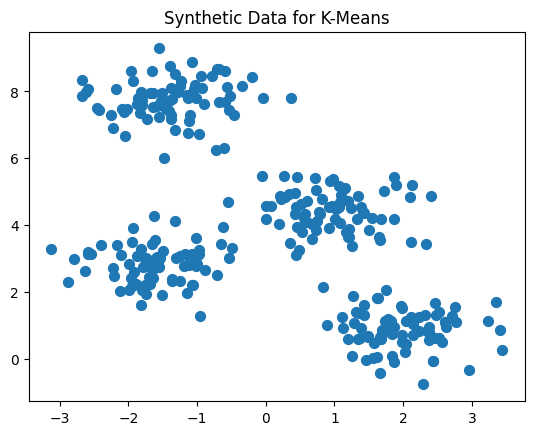

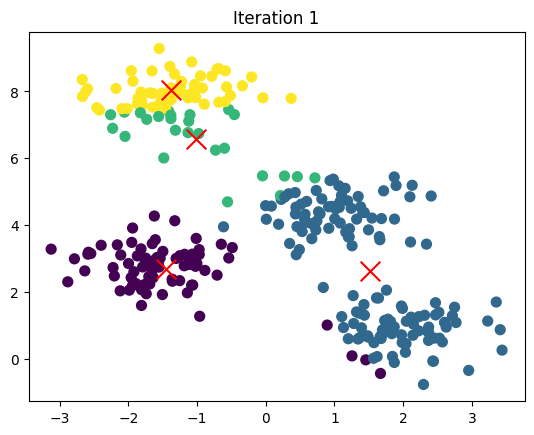

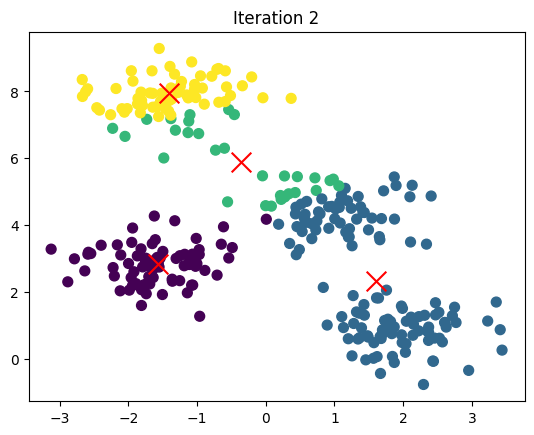

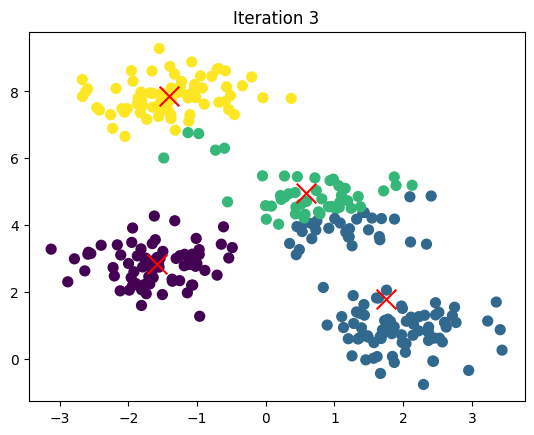

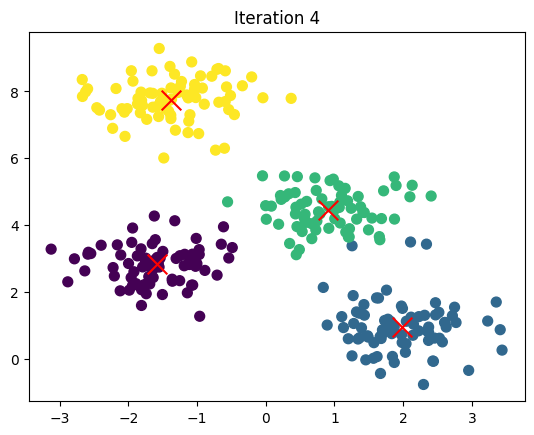

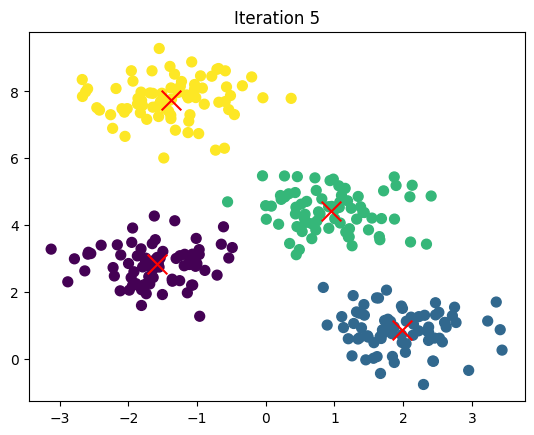

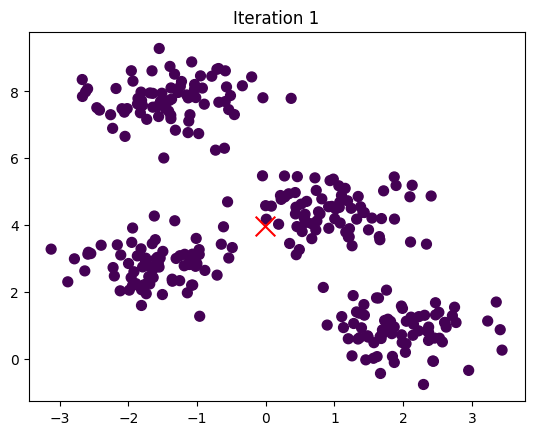

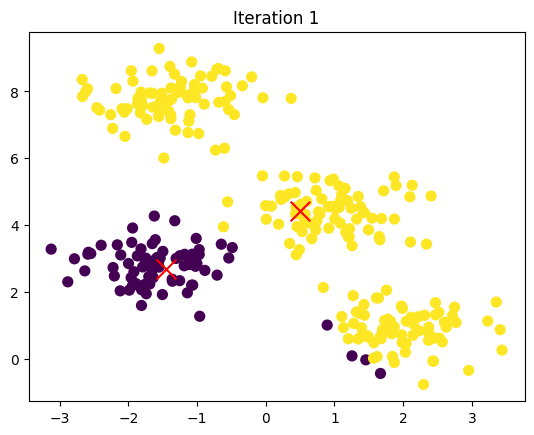

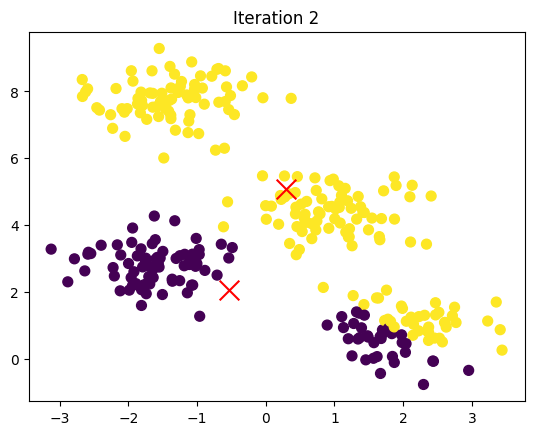

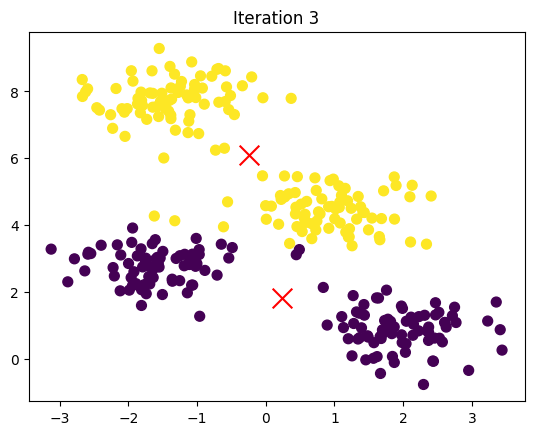

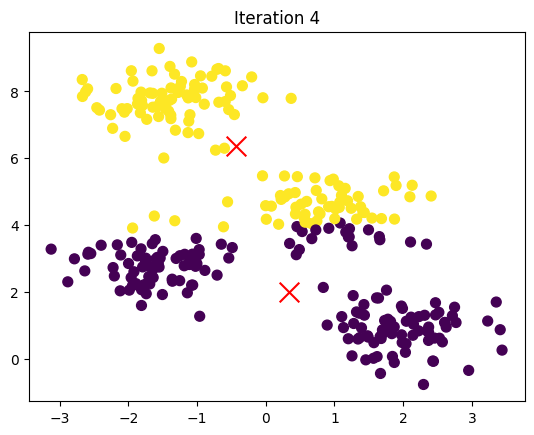

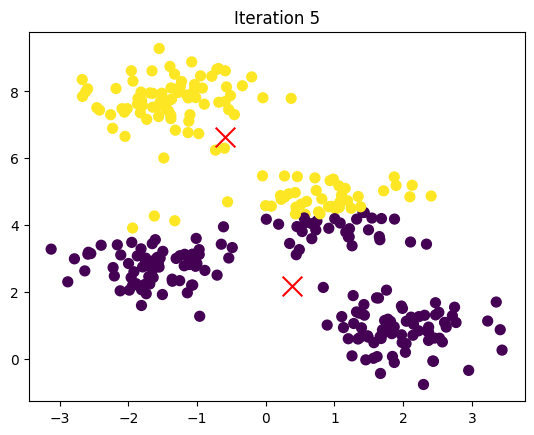

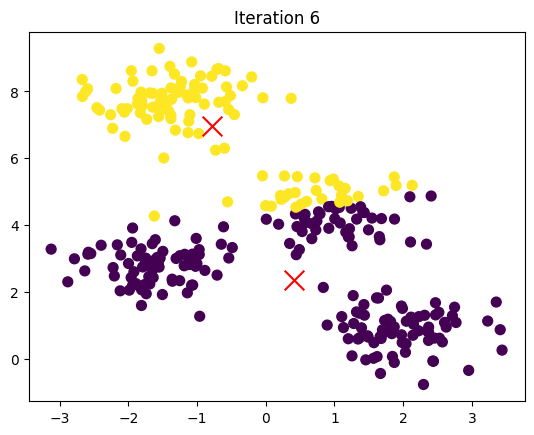

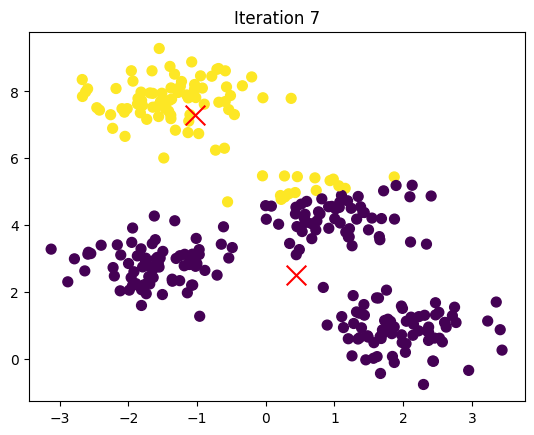

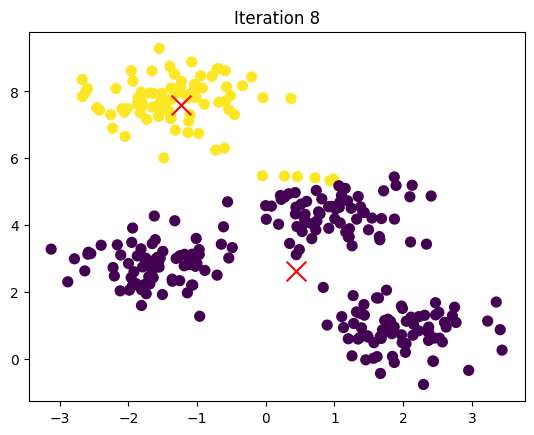

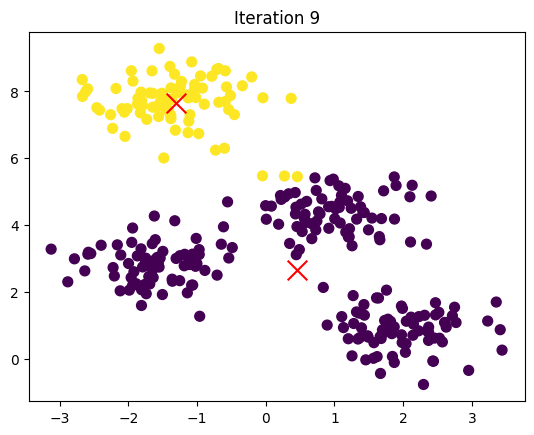

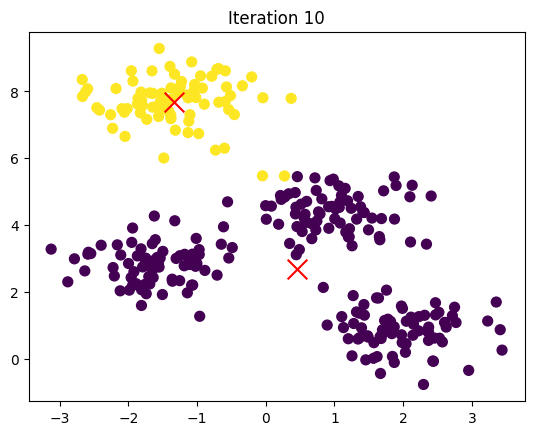

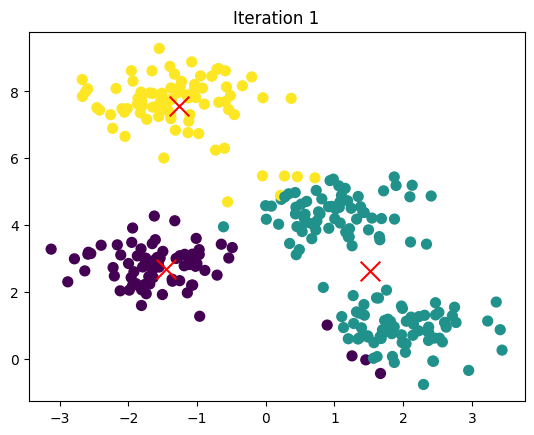

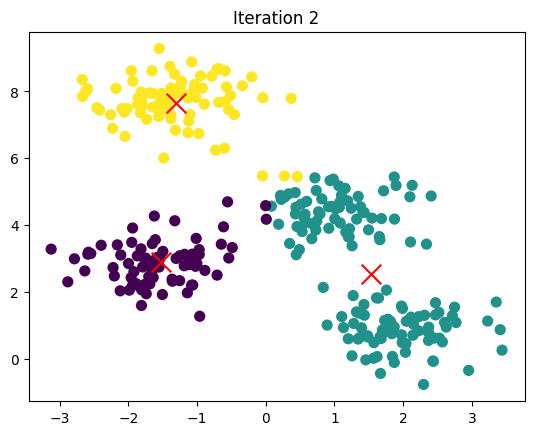

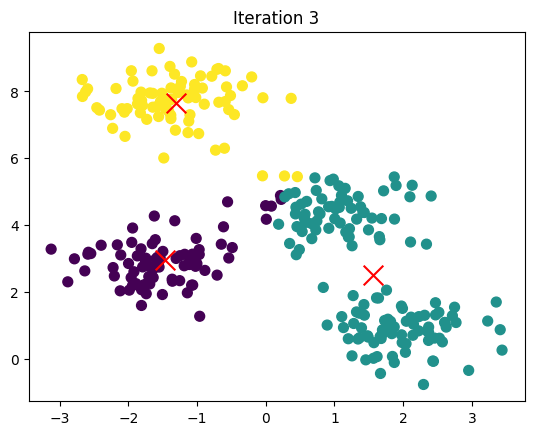

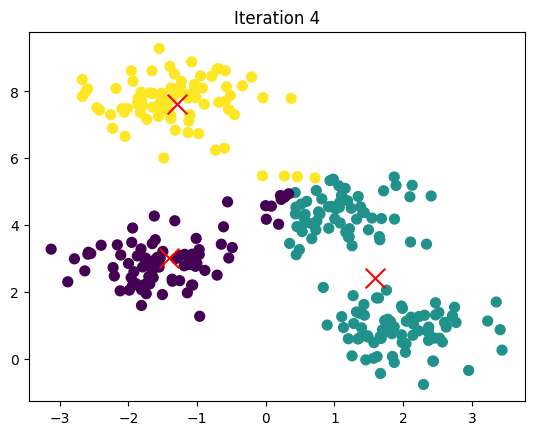

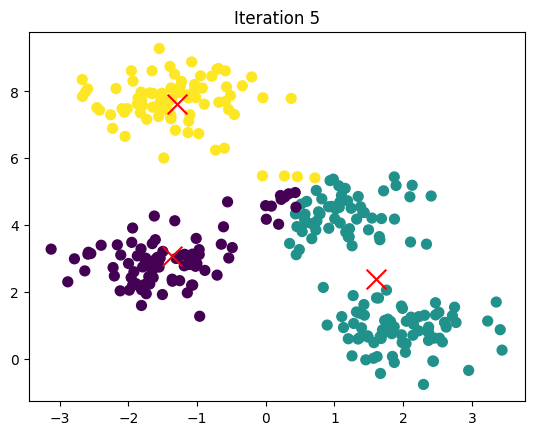

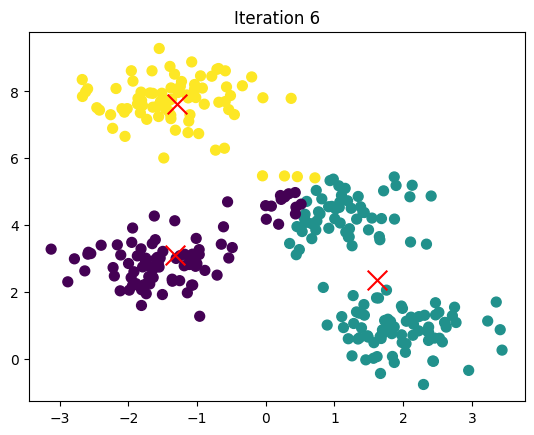

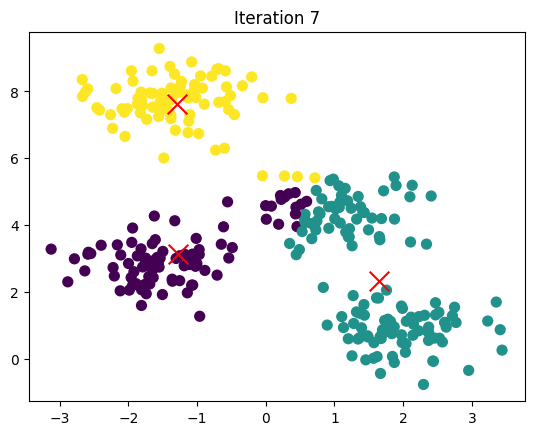

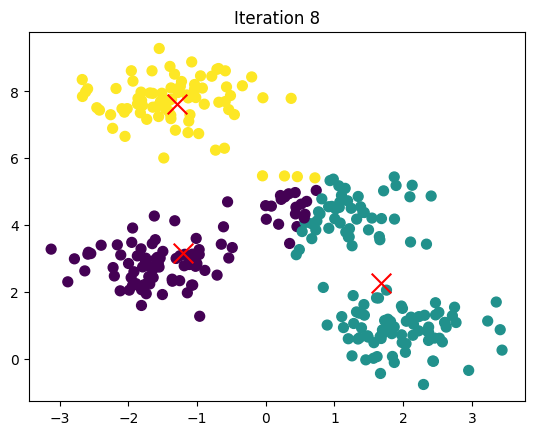

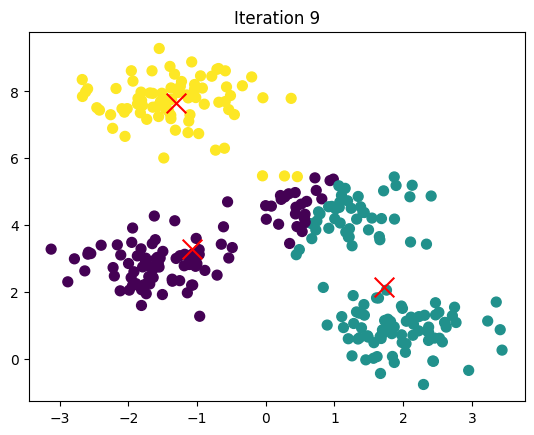

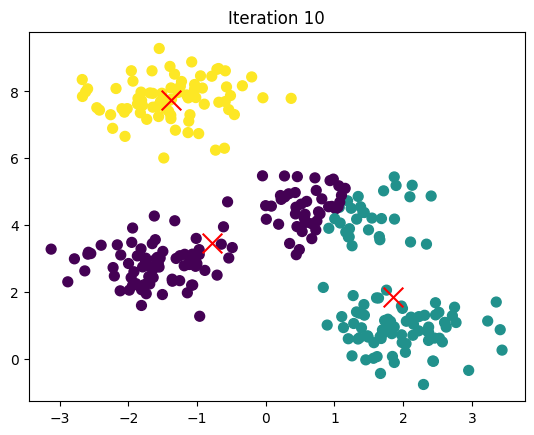

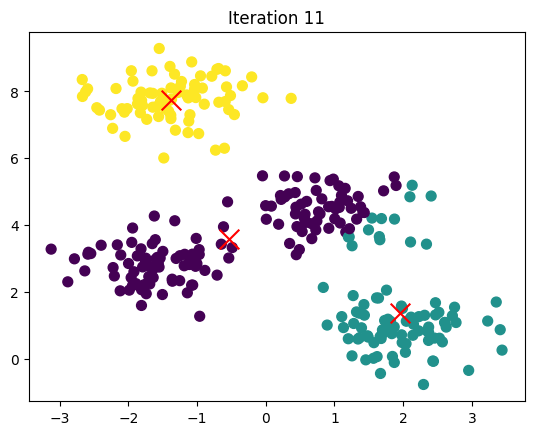

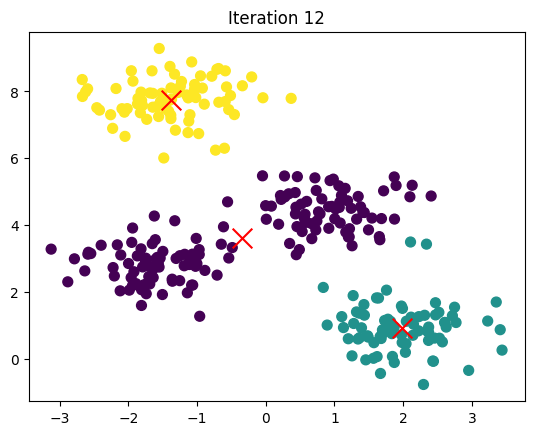

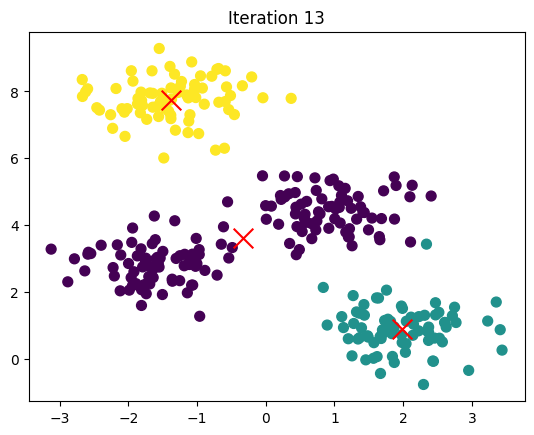

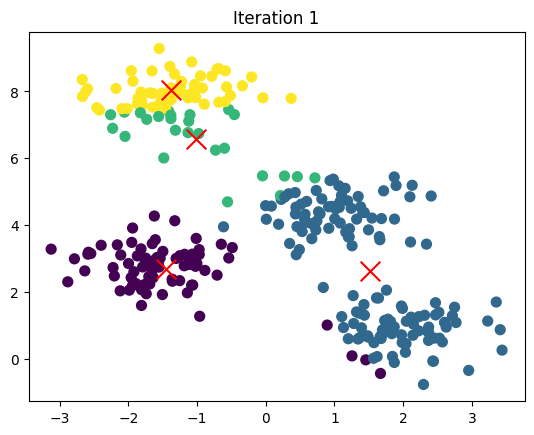

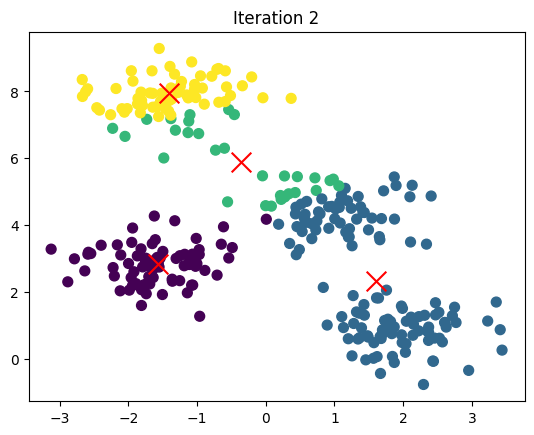

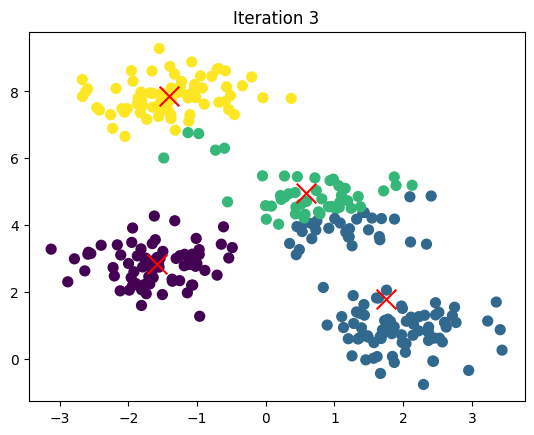

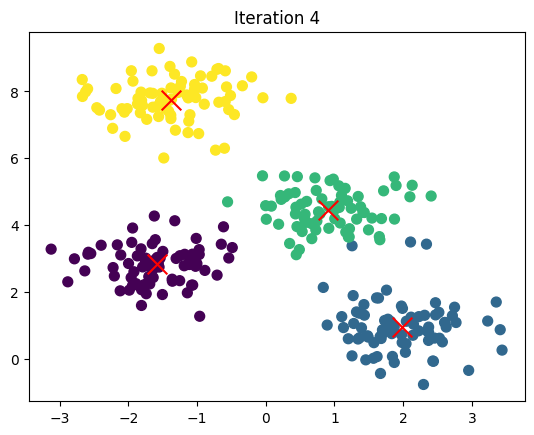

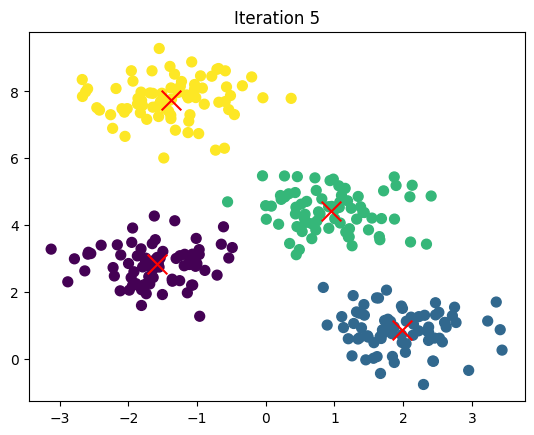

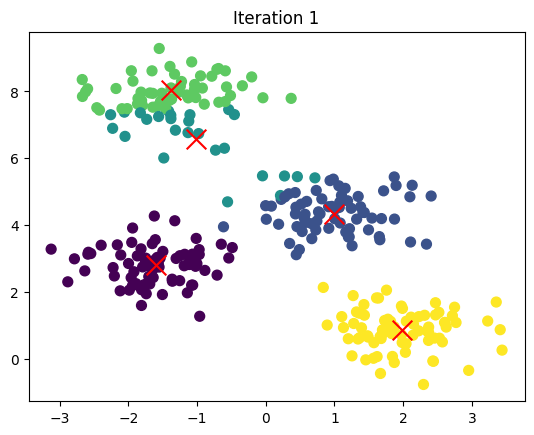

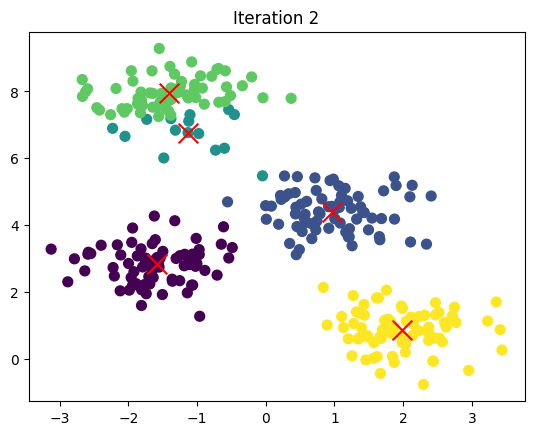

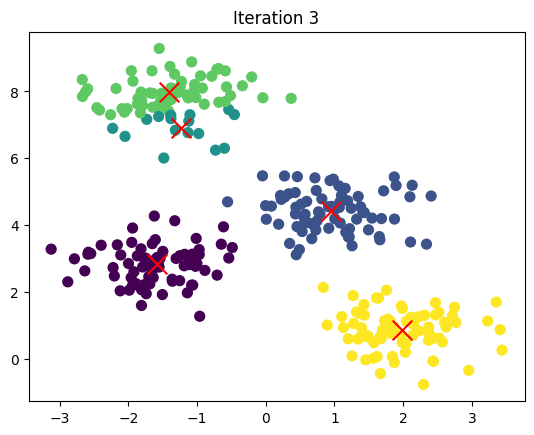

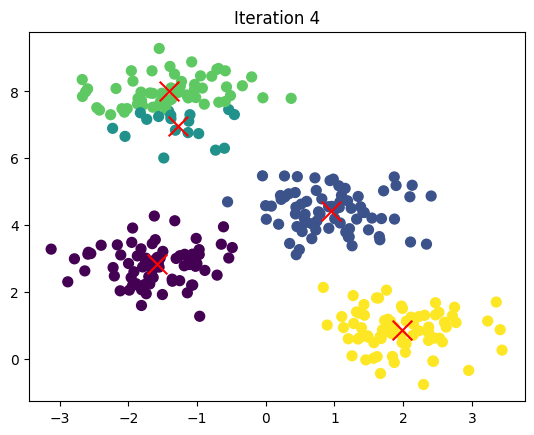

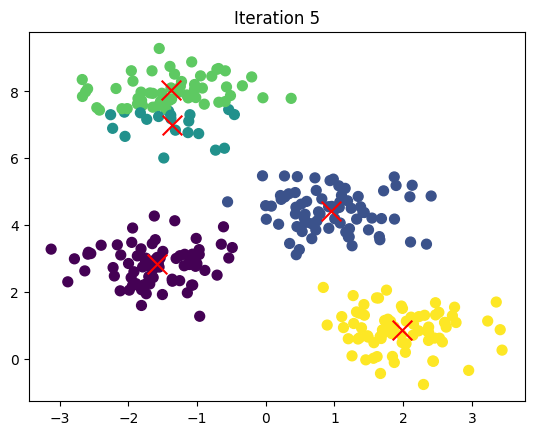

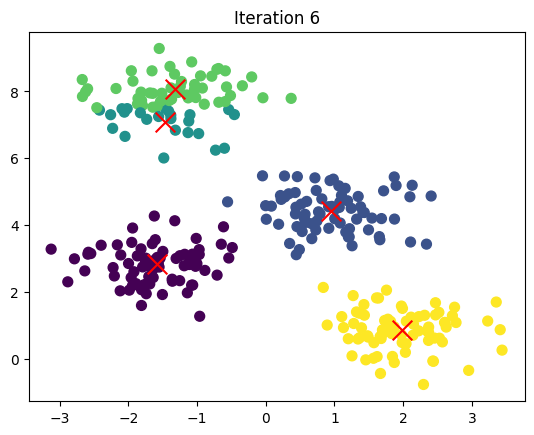

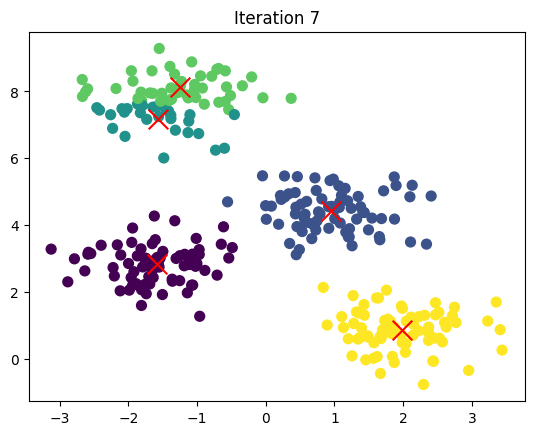

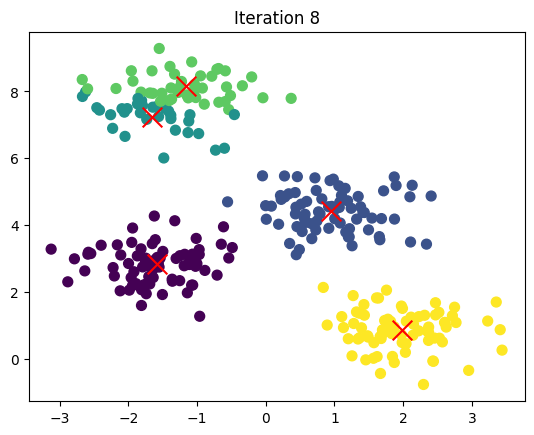

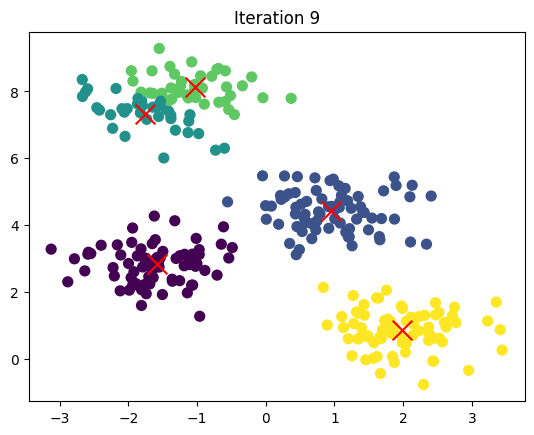

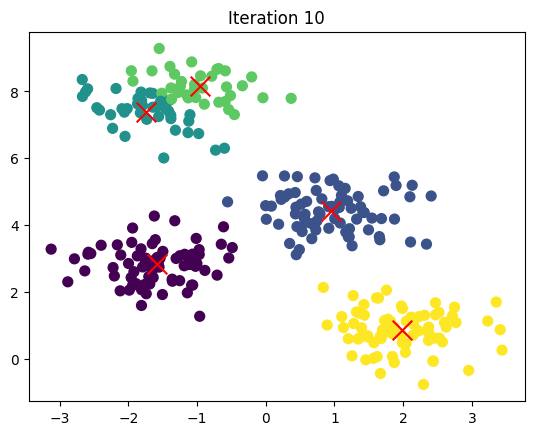

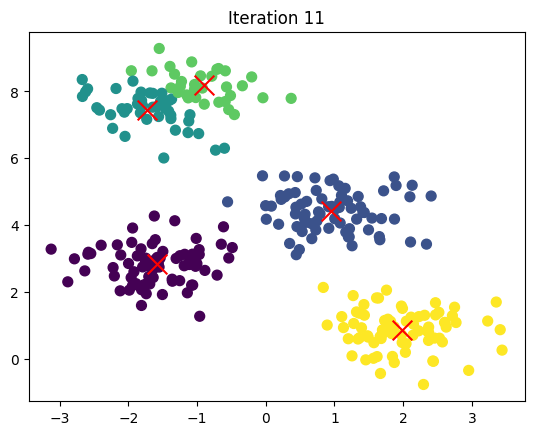

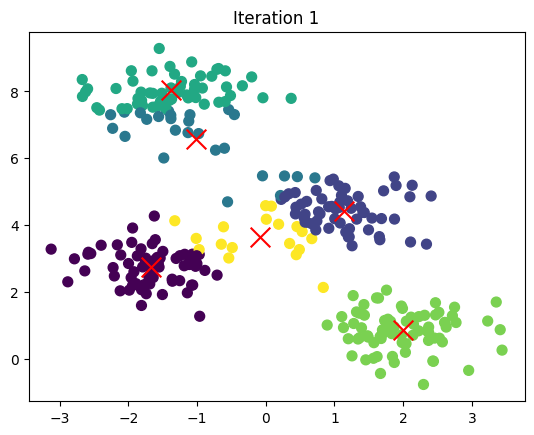

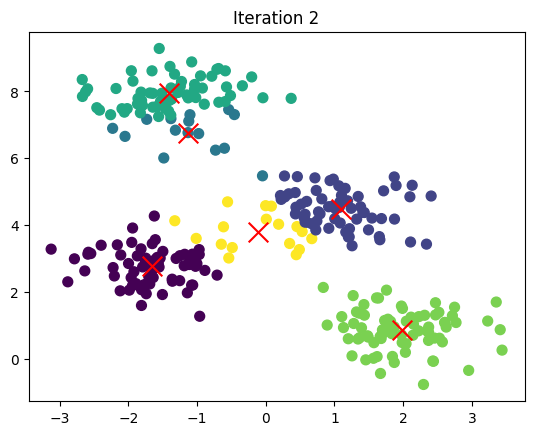

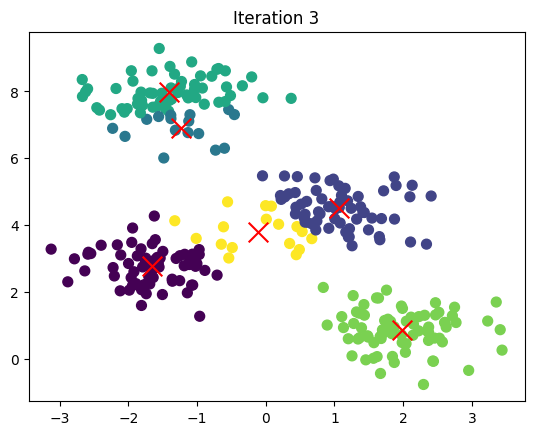

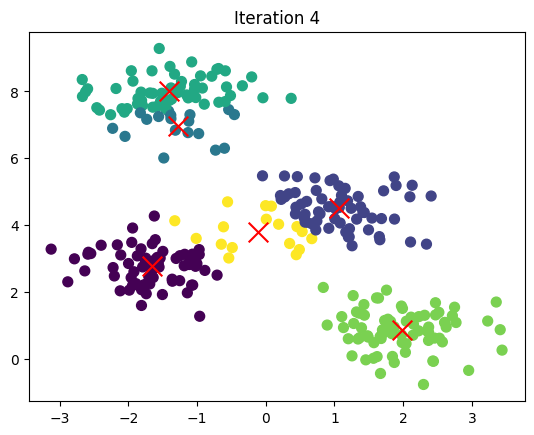

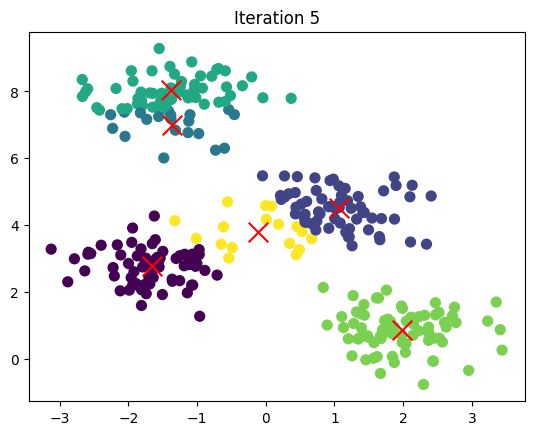

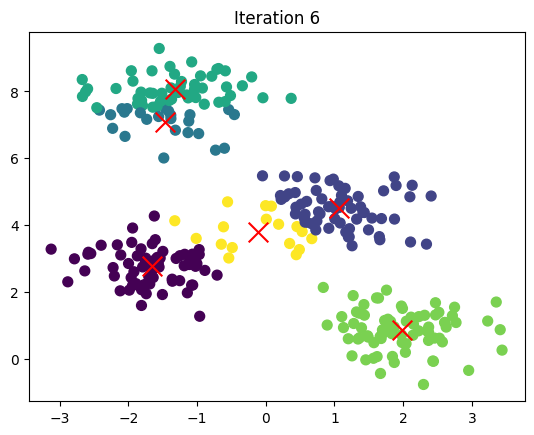

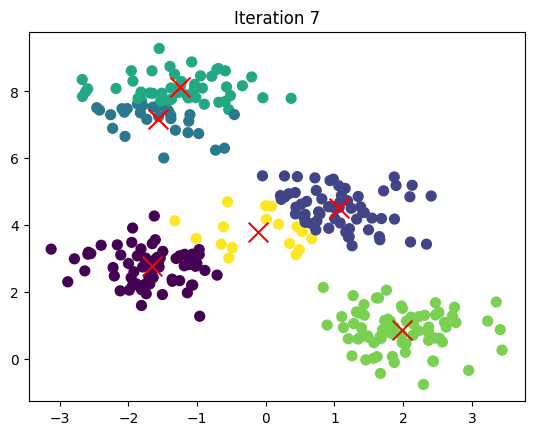

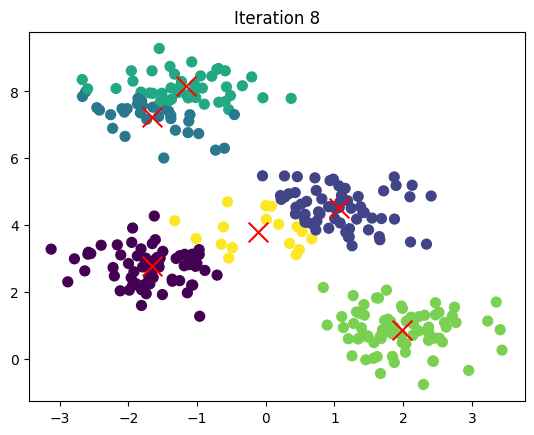

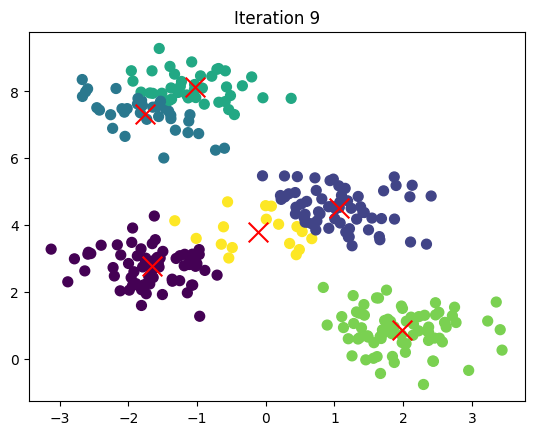

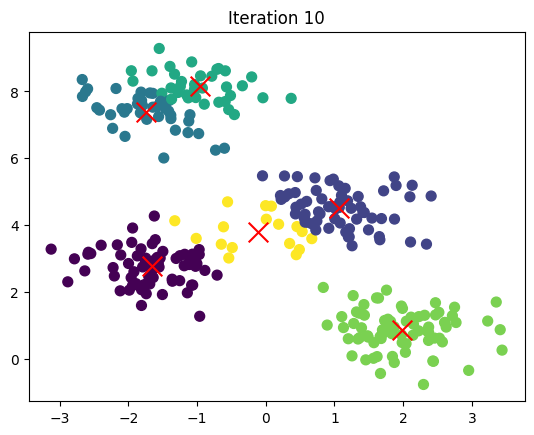

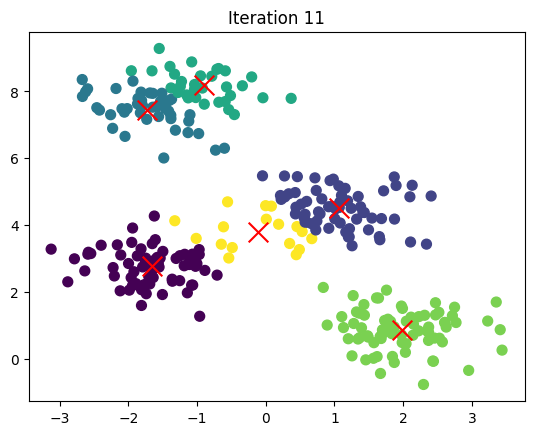

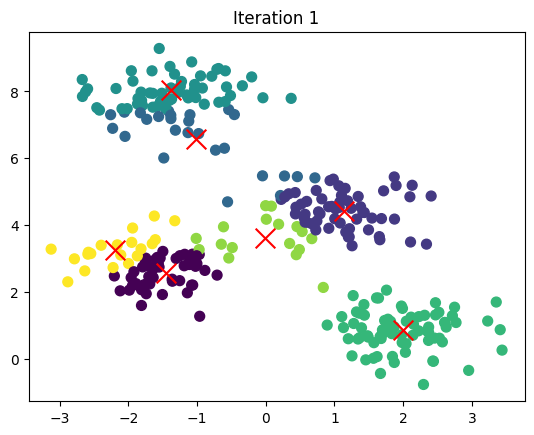

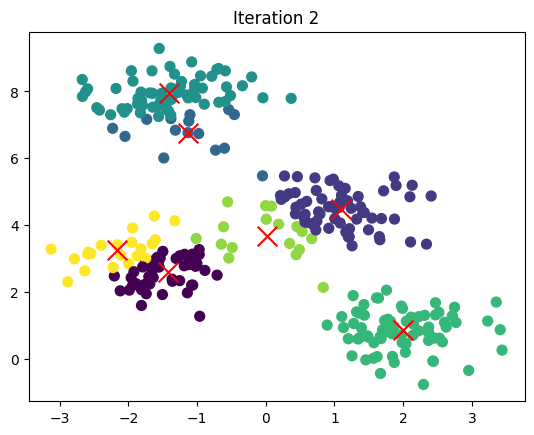

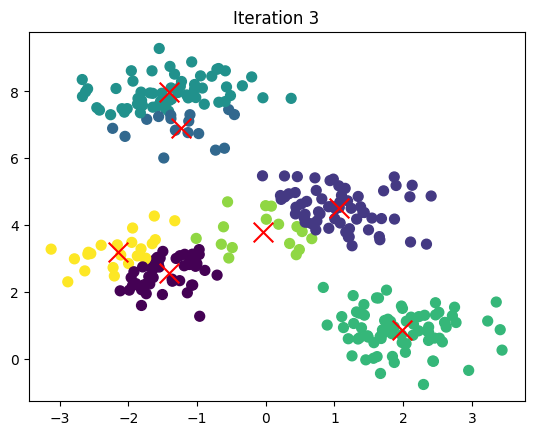

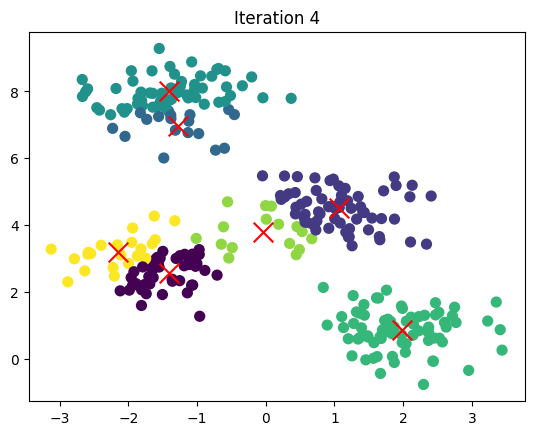

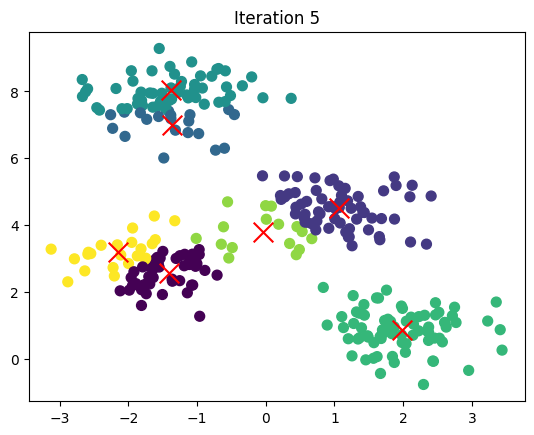

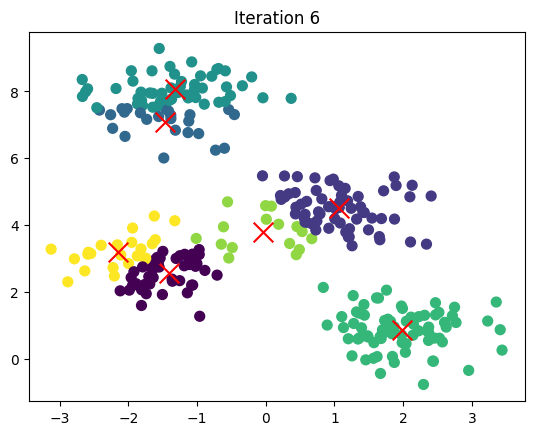

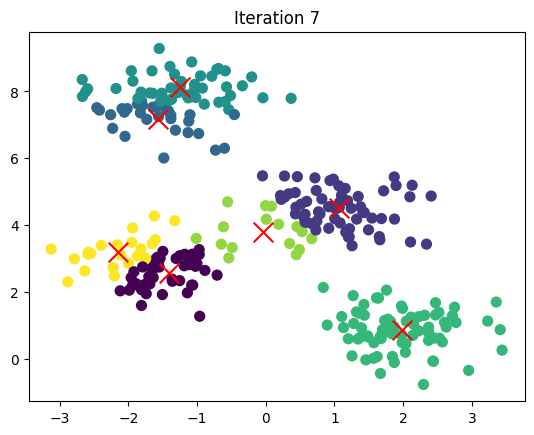

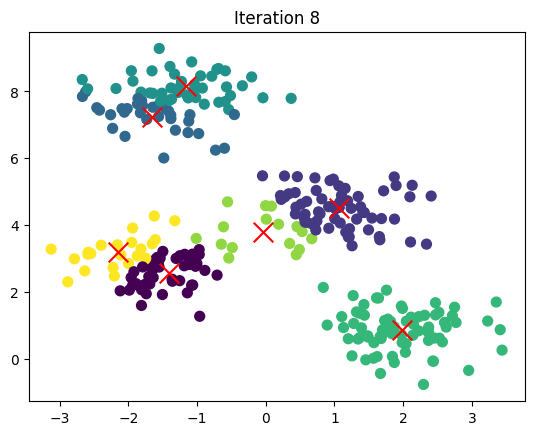

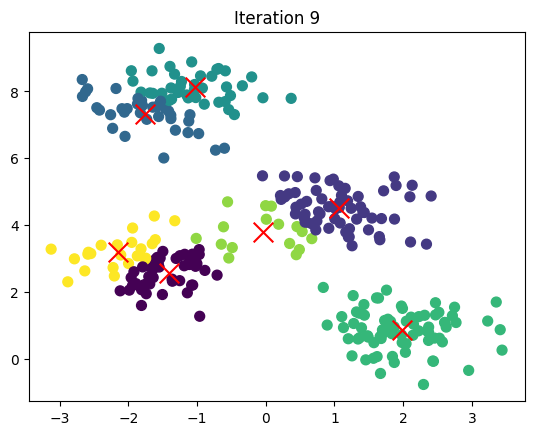

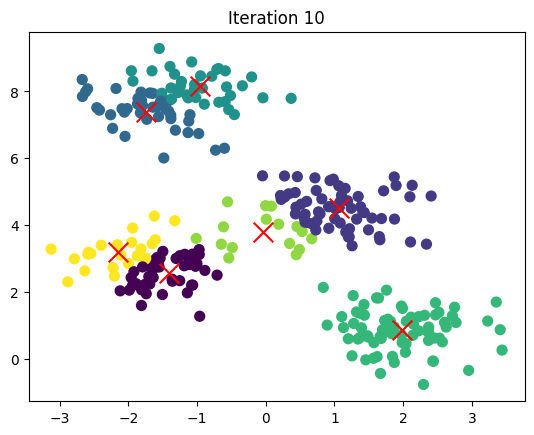

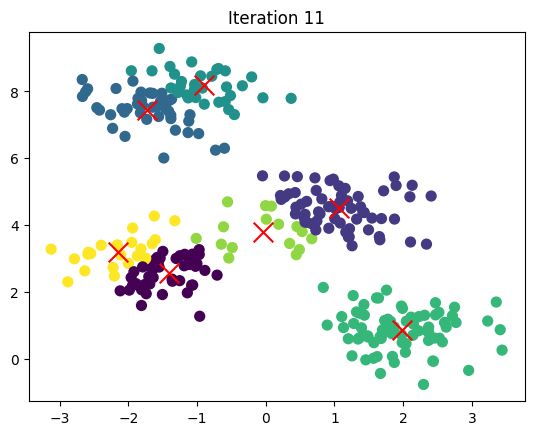

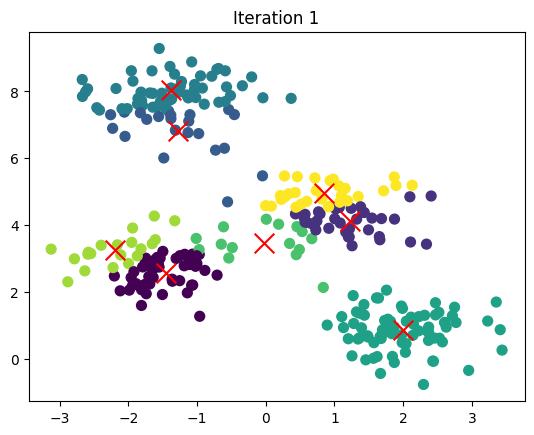

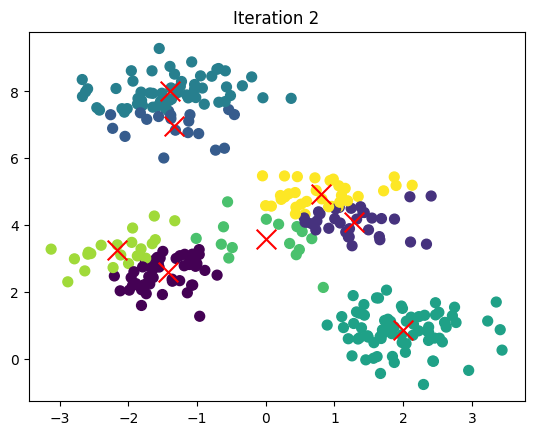

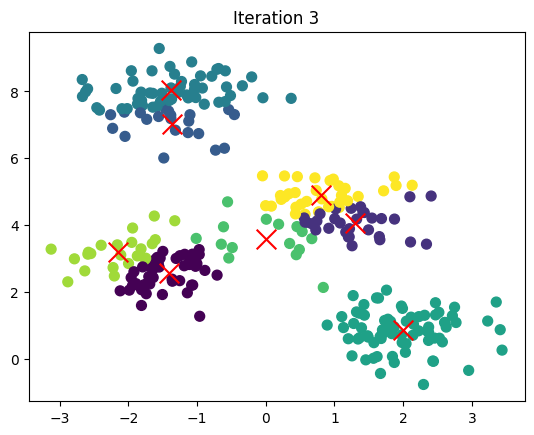

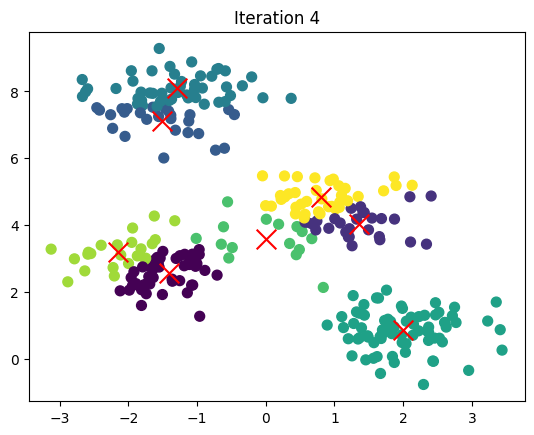

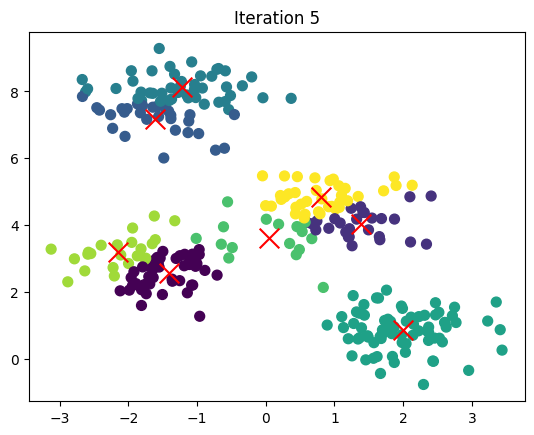

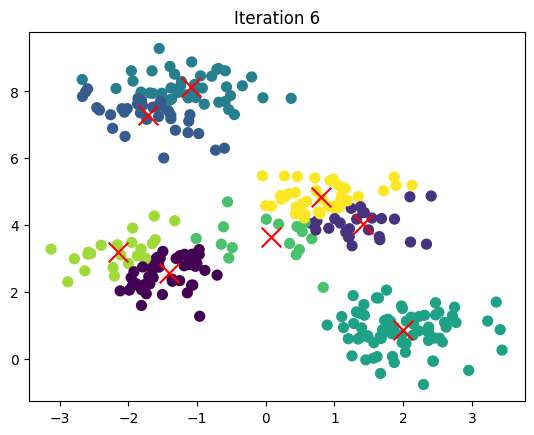

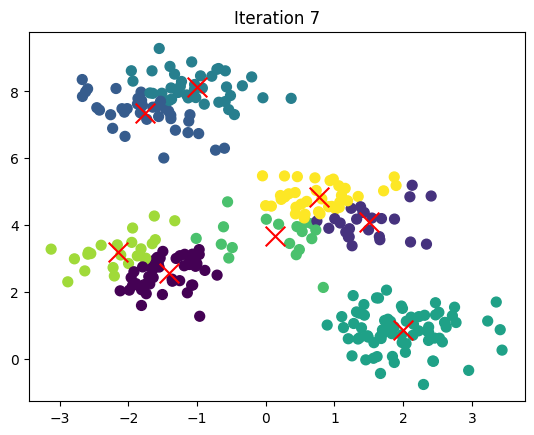

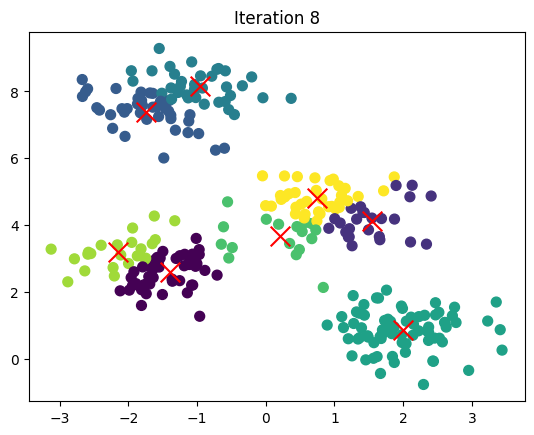

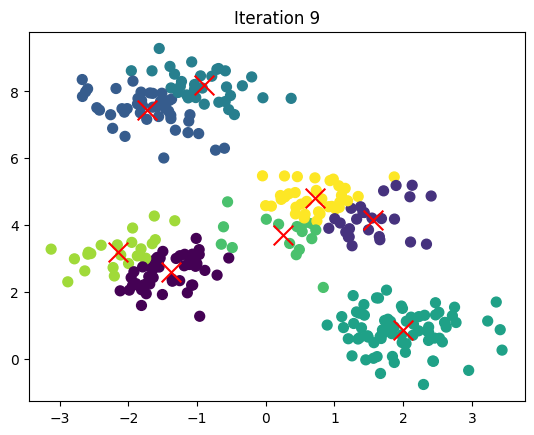

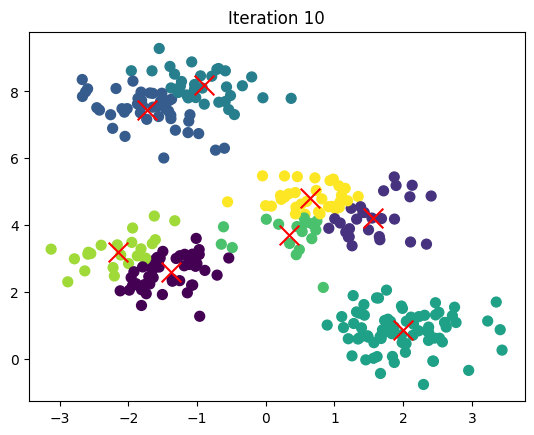

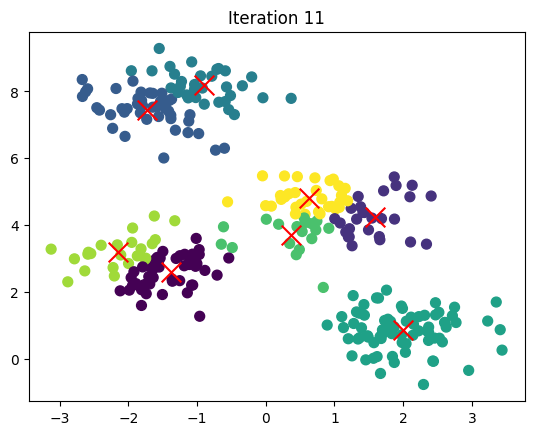

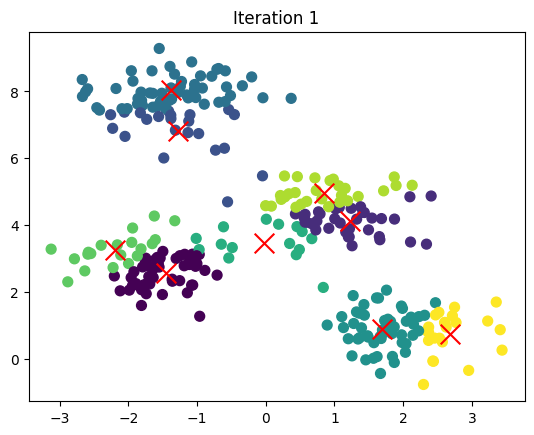

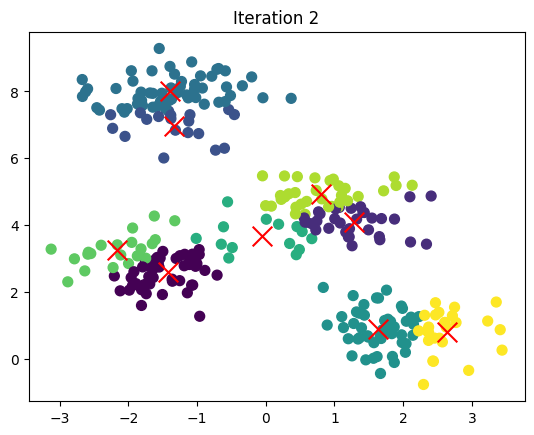

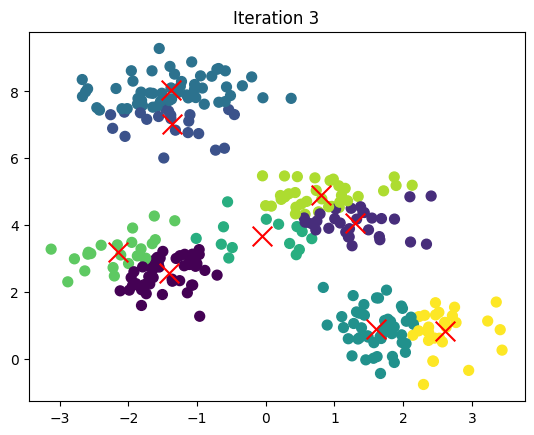

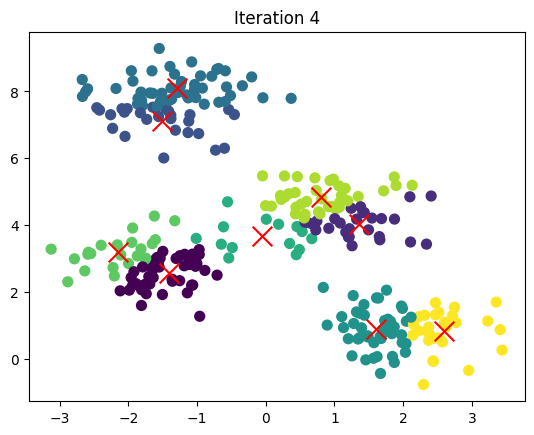

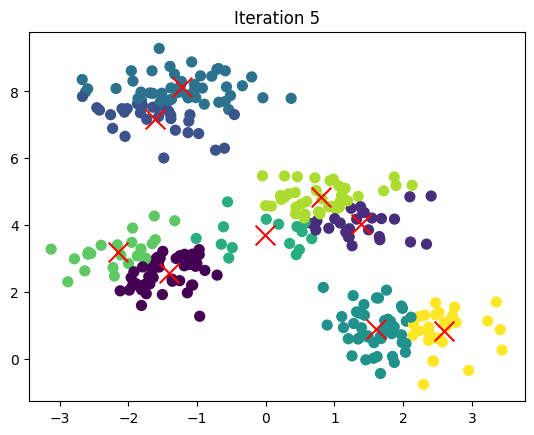

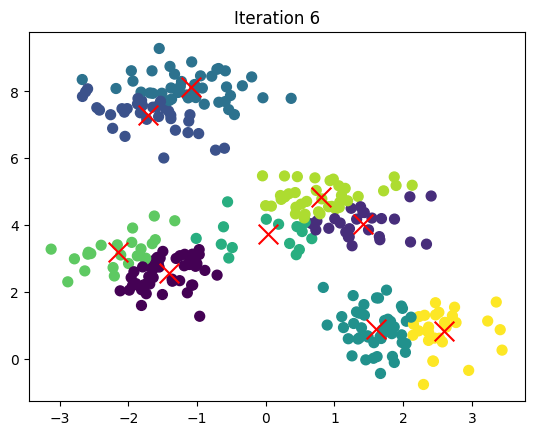

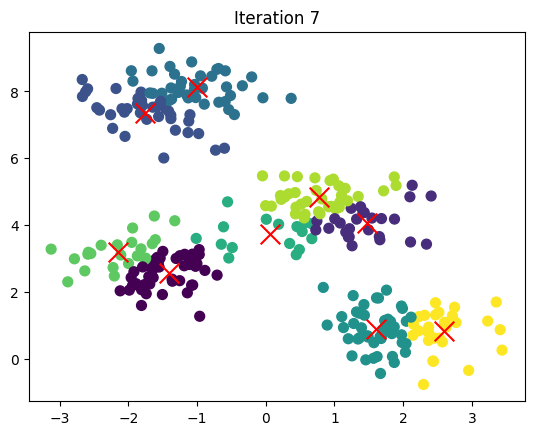

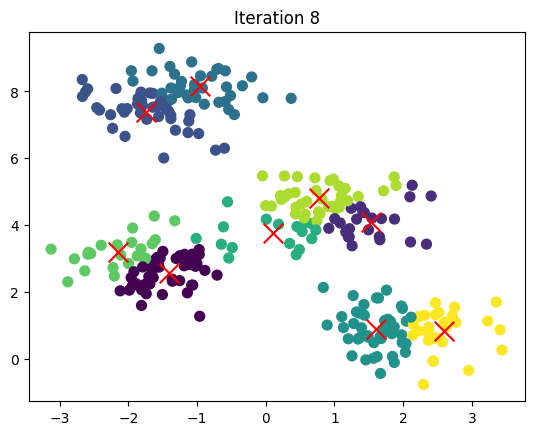

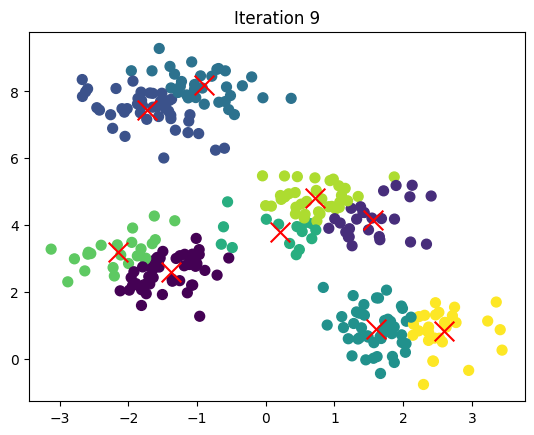

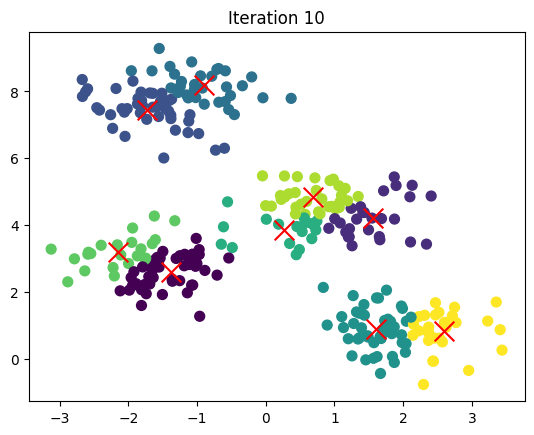

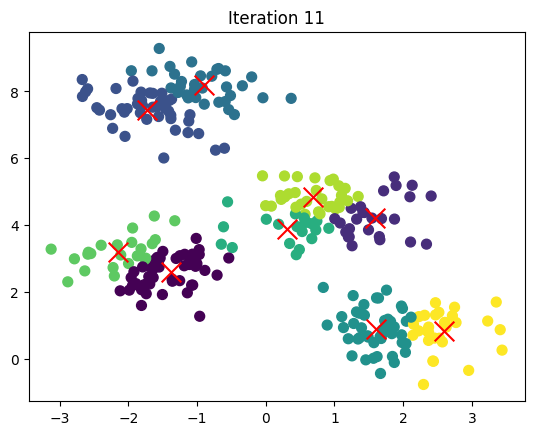

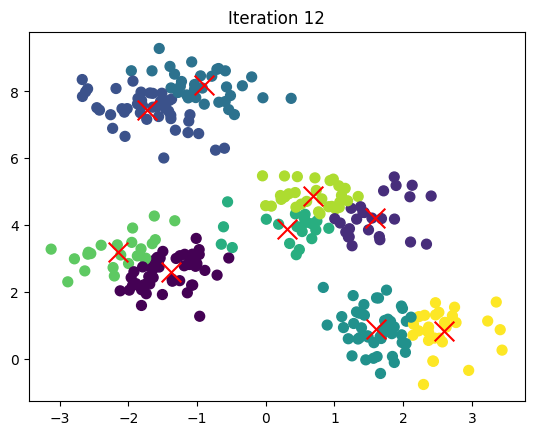

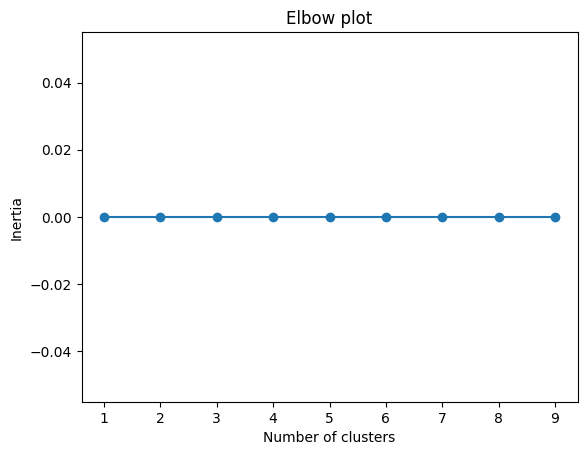

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data for K-Means")
plt.show()

# K-Means algorithm from scratch
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

        # Plot the clusters and centroids
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')
        plt.title(f"Iteration {i+1}")
        plt.show()

    return centroids, clusters

# Run K-Means
k = 4
centroids, clusters = kmeans(X, k)

# Elbow plot
inertia = []
for k in range(1, 10):
    _, clusters = kmeans(X, k)
    current_inertia = sum(np.min(np.linalg.norm(X[:, np.newaxis] - X[clusters == j], axis=2) ** 2) for j in range(k))
    inertia.append(current_inertia)

plt.figure()
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()
